In [3]:
%pylab inline
import pandas
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [20]:
counts = pandas.read_table('all_NumReads_counts_filtlow_all_norm.csv',sep=',',index_col=0)
#counts = pandas.read_table('counts.tsv',index_col=0)
counts.index = [_[:_.index('.')] for _ in counts.index]
counts = counts[sorted(counts.columns)]

In [21]:
info = pandas.read_csv('CTE_sample_info_all.csv',index_col=0)
info.index = [_[:9] for _ in info.index]
info = info.loc[counts.columns]

In [22]:
info.groupby('Status').agg('count').SeqID

Status
CNT        9
CTE_12    13
CTE_34    53
RHI       10
Name: SeqID, dtype: int64

no sym:ENSG00000272403 not in counts, skipping
HOXC10:ENSG00000180818 not in counts, skipping
IL1A:ENSG00000115008 not in counts, skipping
TNF:ENSG00000232810 not in counts, skipping


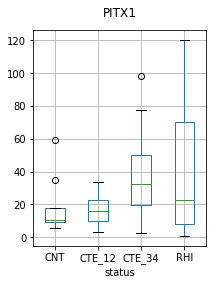

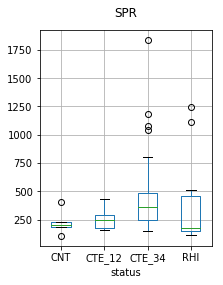

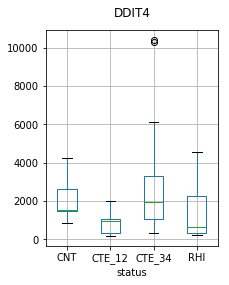

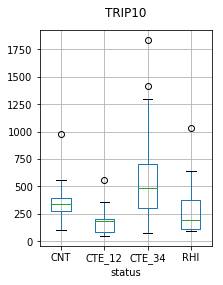

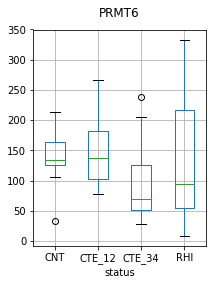

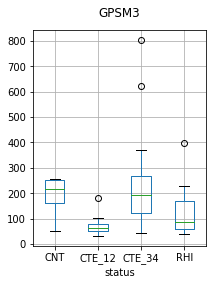

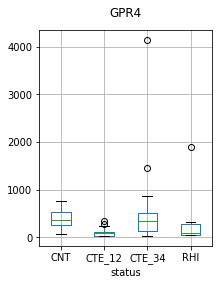

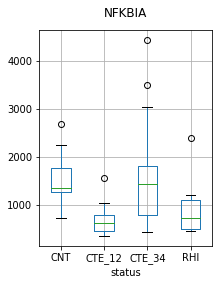

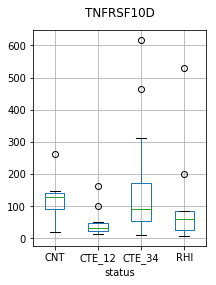

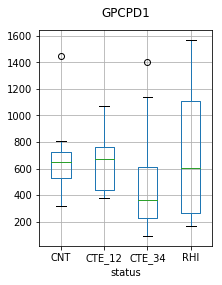

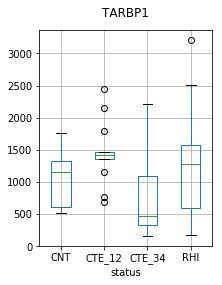

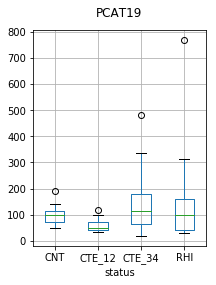

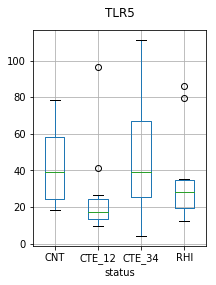

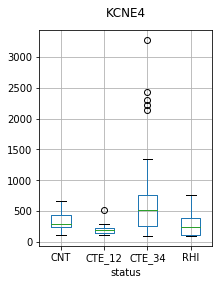

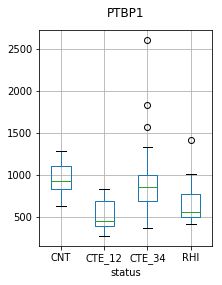

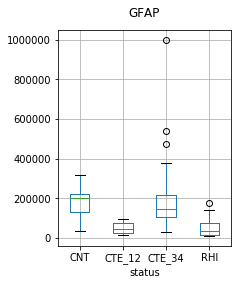

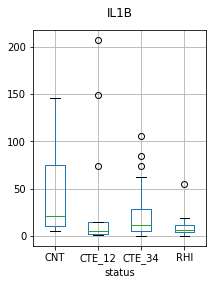

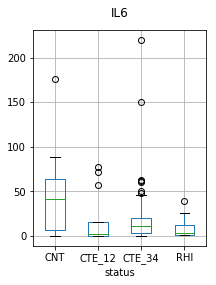

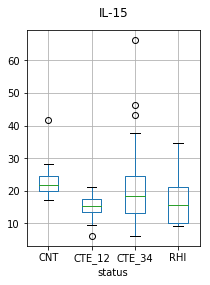

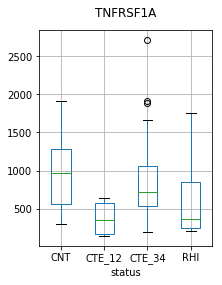

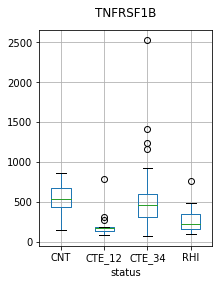

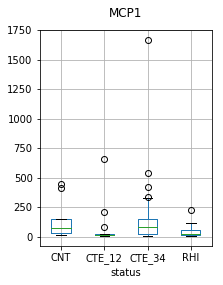

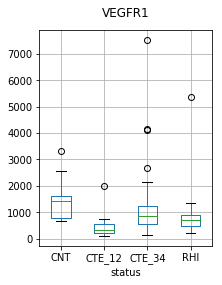

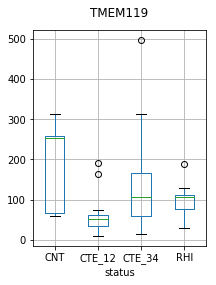

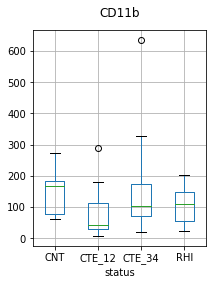

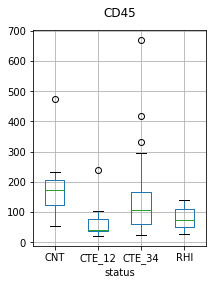

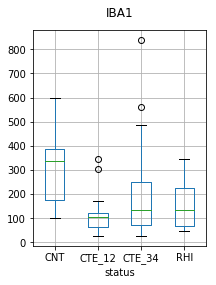

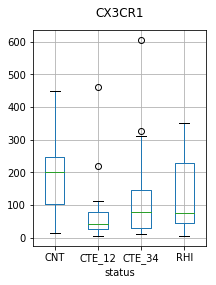

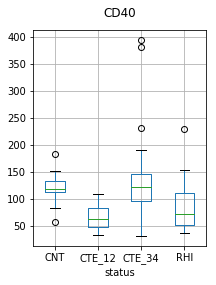

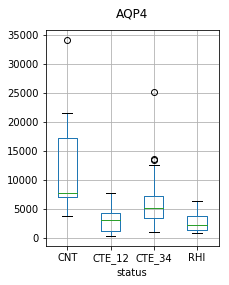

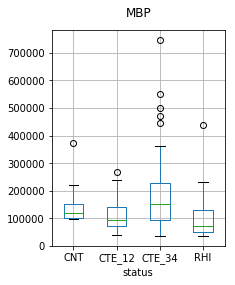

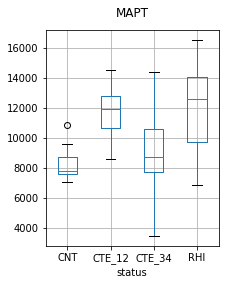

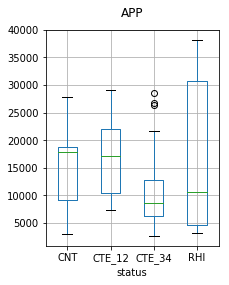

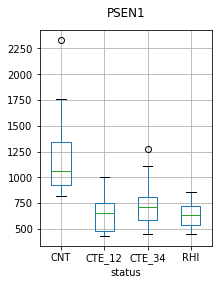

In [27]:
gm = {
    'no sym': 'ENSG00000272403',
    'PITX1': 'ENSG00000069011',
    'HOXC10': 'ENSG00000180818',
    'SPR': 'ENSG00000116096',
    'DDIT4': 'ENSG00000168209',
    'TRIP10': 'ENSG00000125733',
    'PRMT6': 'ENSG00000198890',
    'GPSM3': 'ENSG00000213654',
    'GPR4': 'ENSG00000177464',
    'NFKBIA': 'ENSG00000100906',
    'TNFRSF10D': 'ENSG00000173530',
    'GPCPD1': 'ENSG00000125772',
    'TARBP1': 'ENSG00000059588',
    'PCAT19': 'ENSG00000267107',
    'TLR5': 'ENSG00000187554',
    'KCNE4': 'ENSG00000152049',
    'PTBP1': 'ENSG00000011304',
    'IL1A': 'ENSG00000115008',
    'IL1B': 'ENSG00000125538',
    'IL6':'ENSG00000136244',
    'IL-15': 'ENSG00000164136',
    'TNF': 'ENSG00000232810',
    'TNFRSF1A': 'ENSG00000067182',
    'TNFRSF1B': 'ENSG00000028137',
    'MCP1': 'ENSG00000108691',
    'VEGFR1': 'ENSG00000102755',
    'TMEM119': 'ENSG00000183160',
    'CD11b':'ENSG00000169896',
    'CD45': 'ENSG00000081237',
    'IBA1': 'ENSG00000204472',
    'CX3CR1': 'ENSG00000168329',
    'CD40': 'ENSG00000101017',
    'GFAP':'ENSG00000131095',
    'AQP4': 'ENSG00000171885',
    'MBP': 'ENSG00000197971',
    'MAPT': 'ENSG00000186868',
    'APP': 'ENSG00000142192',
    'PSEN1': 'ENSG00000080815'
}
from matplotlib.backends.backend_pdf import PdfPages
close('all')
for k,v in gm.items() :
    if v not in counts.index :
        print('{}:{} not in counts, skipping'.format(k,v))
        continue
    #f, ax = subplots(1,2,figsize=(12,4))
    f = figure(figsize=(3,4))
    ax = gca()
    df = pandas.DataFrame({
         'counts':counts.loc[v],
         'status':info.Status,
         #'cluster':info.Cluster,
         'name':info.SampleName
        }
    )
    df.sort_values('status',inplace=True)
    df.boxplot(column='counts',by='status',ax=ax)
    #df.boxplot(column='counts',by='cluster',ax=ax[1])
    ax.set_title('')
    f.suptitle(k)
    #f = figure(figsize=(20,4))
    #df.counts.plot.bar(x='name',y='counts',ax=gca())
    #gca().set_xticklabels(['{} ({})'.format(*_) for _ in zip(df.name,df.status)])
    #title(k)

In [28]:
counts.loc[gm['PITX1']]

CNTL_0020      9.135995
CNTL_0021     10.529742
CNTL_0043     14.353564
CNTL_0044     10.550628
CNTL_0045     59.446954
CNTL_0069      5.597846
CNTL_0070     18.103018
CNTL_0084     34.624031
CNTL_0085      6.213780
CTEM_0003      9.139002
CTEM_0004     12.373422
CTEM_0005     31.072761
CTEM_0025     22.907149
CTEM_0026     21.757472
CTEM_0029     10.602260
CTEM_0050     10.104837
CTEM_0051     16.284861
CTEM_0054      9.249382
CTEM_0055     22.683608
CTEM_0074     33.409122
CTEM_0077     17.870037
CTEM_0078      3.247202
CTES_0006     25.452816
CTES_0007      7.888980
CTES_0008     29.854971
CTES_0009     30.913877
CTES_0010     15.044241
CTES_0011      4.997203
CTES_0012     42.616063
CTES_0013     45.282179
                ...    
CTES_0057      7.256190
CTES_0058     37.423609
CTES_0059     42.675020
CTES_0060     98.093383
CTES_0061     51.010808
CTES_0062      2.882075
CTES_0063     32.657196
CTES_0064     62.774356
CTES_0065     39.296559
CTES_0066     70.567975
CTES_0067     20